In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
import os 
from sklearn.metrics import roc_curve, auc

chose_data = 'full_data_without_producID.csv'
#chose_data = 'significant_data_05.csv'


In [43]:
data = pd.read_csv(chose_data)
total_data =  len(data.index)
print('the number of sample:',total_data)
adata = data.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'Sales', 'Late_delivery_risk'], axis = 1)
adata.keys()

the number of sample: 180511


Index(['order_weekday', 'time_delta'], dtype='object')

In [40]:
x_train,x_test,y_train,y_test = train_test_split(data.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'Sales', 'Late_delivery_risk'], axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.3)

RandomFores

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#lg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)

# Create a Logistic Regression classifier
clf = LogisticRegression(penalty='l1', solver='liblinear')

# Train the classifier
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6356871145252428
              precision    recall  f1-score   support

           0       0.59      0.63      0.61     24554
           1       0.67      0.64      0.66     29600

    accuracy                           0.64     54154
   macro avg       0.63      0.63      0.63     54154
weighted avg       0.64      0.64      0.64     54154



In [48]:

from sklearn import preprocessing

x_train  = preprocessing.normalize(x_train)
x_test  = preprocessing.normalize(x_test)

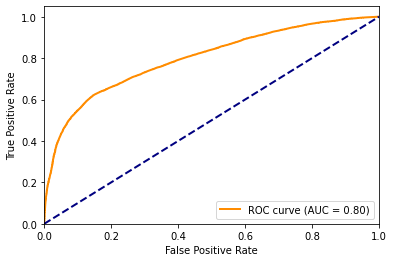

In [35]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.01, n_estimators=100,
                       verbose=0, warm_start=True)
model = rf.fit(x_train, y_train)
# Train a Random Forest classifier
#model = RandomForestClassifier()
#model.fit(x_train, y_train)

# Predict probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

mức độ quan trọng của feature: [0.00933764 0.10867032 0.11542512 0.03329555 0.01470797 0.7185634 ]
feature quan trọng nhất: time_delta


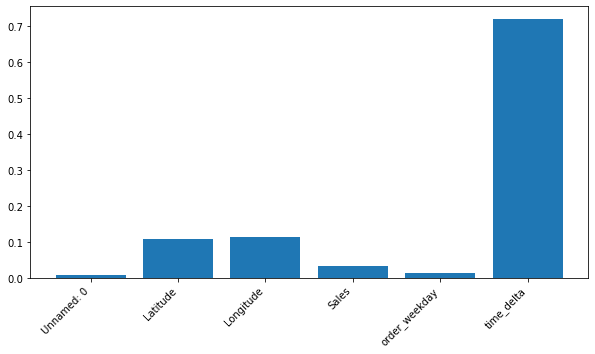

In [36]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 
plt.figure(figsize=(10,5))
print('mức độ quan trọng của feature:', rf.feature_importances_)
plt.bar(list(data.drop('Late_delivery_risk', axis = 1).keys()),rf.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop('Late_delivery_risk', axis = 1).keys())[np.argmax(rf.feature_importances_)])

In [37]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[13995  6369]
 [ 6457 18307]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69     20364
           1       0.74      0.74      0.74     24764

    accuracy                           0.72     45128
   macro avg       0.71      0.71      0.71     45128
weighted avg       0.72      0.72      0.72     45128

0.713250396649498


<Figure size 432x288 with 0 Axes>

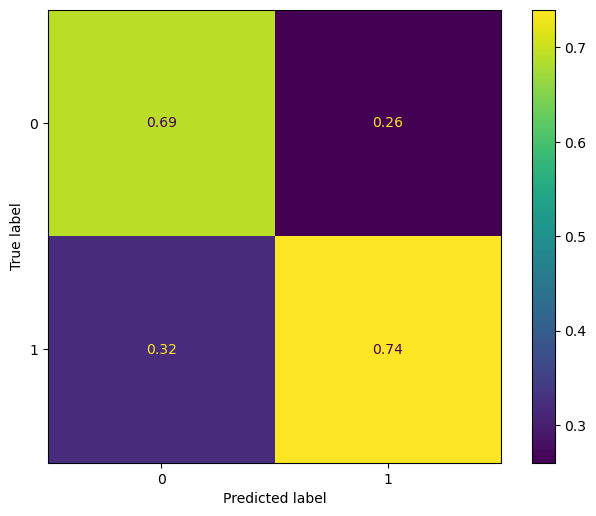

In [38]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
#ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('confusion_matrix_RF.png')


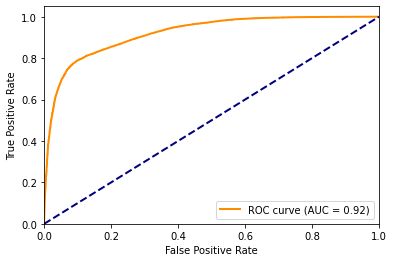

In [39]:
xgb = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)
model = xgb.fit(x_train,y_train)
# Predict probabilities for the test set
y_prob = model.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[17254  3110]
 [ 4295 20469]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     20364
           1       0.87      0.83      0.85     24764

    accuracy                           0.84     45128
   macro avg       0.83      0.84      0.84     45128
weighted avg       0.84      0.84      0.84     45128

0.8369211326241661


<Figure size 432x288 with 0 Axes>

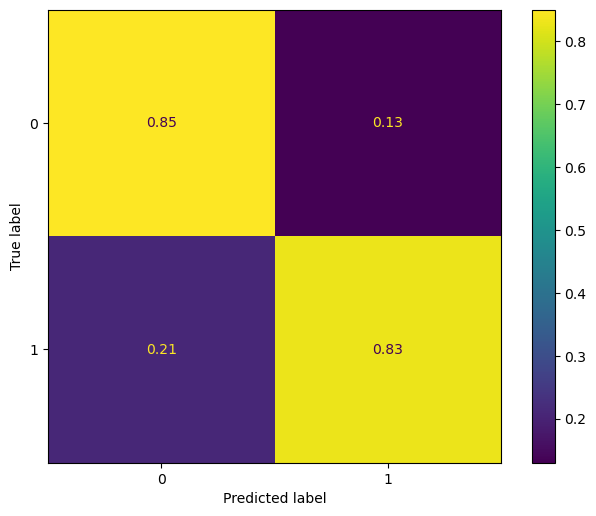

In [41]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

# set the plot title using the axes object
#ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('confusion_matrix_XGB.png')


mức độ quan trọng của feature: [0.0857222  0.19846901 0.23374365 0.06246744 0.06237881 0.3572189 ]
feature quan trọng nhất: time_delta


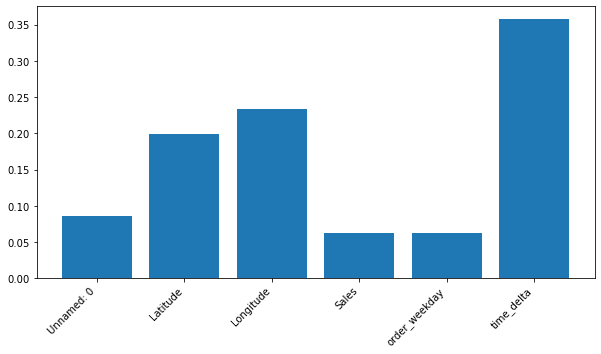

In [42]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 
plt.figure(figsize=(10,5))
print('mức độ quan trọng của feature:', xgb.feature_importances_)
plt.bar(list(data.drop('Late_delivery_risk', axis = 1).keys()),xgb.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop('Late_delivery_risk', axis = 1).keys())[np.argmax(xgb.feature_importances_)])

*logistic regression


In [4]:

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)


lg.fit(x_train, y_train)

#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = lg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
#print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)



[[    6 20564]
 [    6 24554]]
              precision    recall  f1-score   support

           0       0.50      0.00      0.00     20570
           1       0.54      1.00      0.70     24560

    accuracy                           0.54     45130
   macro avg       0.52      0.50      0.35     45130
weighted avg       0.52      0.54      0.38     45130



C:\Users\THINKPAD\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<AxesSubplot:title={'center':'Feature Importance'}>

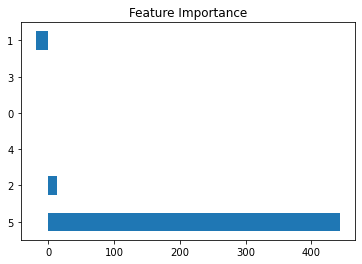

In [44]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 

importance = lg.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

*SVM

In [56]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model = clf.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
model.score(x_test, y_test)


[[19116  1139]
 [ 1168 23707]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     20255
           1       0.95      0.95      0.95     24875

    accuracy                           0.95     45130
   macro avg       0.95      0.95      0.95     45130
weighted avg       0.95      0.95      0.95     45130

0.9484060986244478


0.9488810104143586

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     20255
           1       0.95      0.95      0.95     24875

    accuracy                           0.95     45130
   macro avg       0.95      0.95      0.95     45130
weighted avg       0.95      0.95      0.95     45130



KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=30)  # Specify the number of neighbors (K)

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5630622645690229


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50     20255
           1       0.60      0.62      0.61     24875

    accuracy                           0.56     45130
   macro avg       0.56      0.56      0.56     45130
weighted avg       0.56      0.56      0.56     45130



In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50     20255
           1       0.60      0.62      0.61     24875

    accuracy                           0.56     45130
   macro avg       0.56      0.56      0.56     45130
weighted avg       0.56      0.56      0.56     45130



Linear Discriminant Analysis (LDA)

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)

Accuracy: 0.589607799689785
[[18993  1262]
 [  824 24051]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     20255
           1       0.95      0.97      0.96     24875

    accuracy                           0.95     45130
   macro avg       0.95      0.95      0.95     45130
weighted avg       0.95      0.95      0.95     45130

0.9522843841523093
